In [1]:
#import pacakges
import numpy as np
from nn import (nn, io, preprocess)
import sklearn.datasets as sk
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
#Load the digits dataset
digits = sk.load_digits()
X = digits.data

In [3]:
#Normalize the data to be between 0 and 1
X = X/np.max(X)

In [4]:
#Split into training and validation sets
X_val, X_train = train_test_split(X, test_size=0.8)

In [6]:
#Check that the split is reasonable
print(np.shape(X_train))
print(np.shape(X_val))

(1438, 64)
(359, 64)


In [7]:
#Get batch size
batch_size = np.shape(X_train)[0]

In [8]:
#Generate nn architecture
arch = [{'input_dim': 64, 'output_dim': 16, 'activation': 'relu'}, {'input_dim': 16, 'output_dim': 64, 'activation': 'sigmoid'}]

In [9]:
#Generate an instance of the nn
digits_nn = nn.NeuralNetwork(arch, lr = 10, seed = 2, batch_size=batch_size, epochs= 5000, loss_function= 'MSE')

In [10]:
#Train the nn
per_epoch_loss_train,per_epoch_loss_val = digits_nn.fit(X_train, X_train.T, X_val, X_val.T)

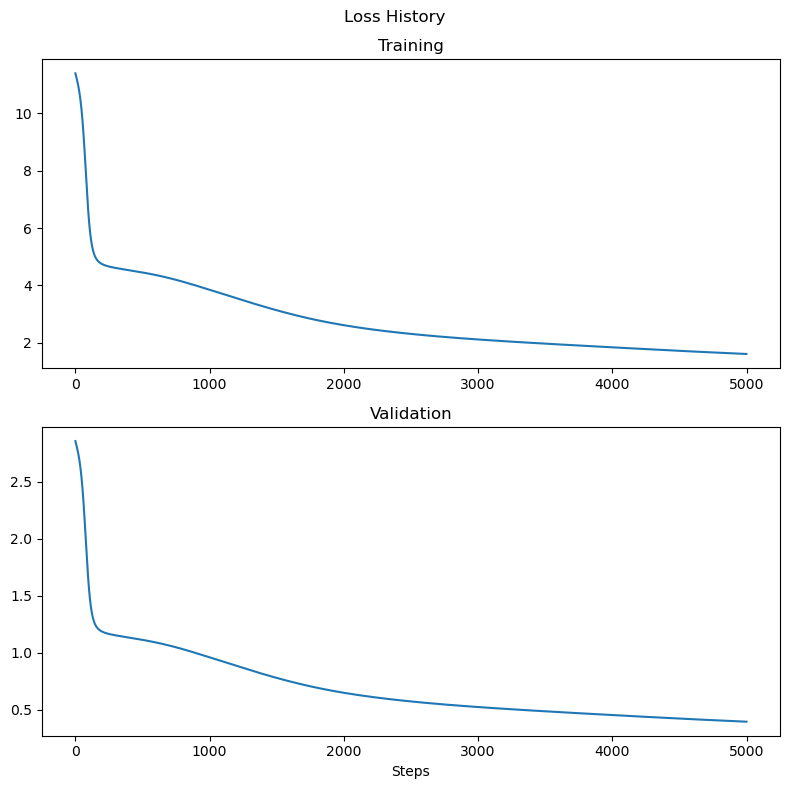

In [11]:
# Create plot
fig, axs = plt.subplots(2, figsize=(8, 8))
fig.suptitle('Loss History')
axs[0].plot(np.arange(len(per_epoch_loss_train)), per_epoch_loss_train)
axs[0].set_title('Training')
axs[1].plot(np.arange(len(per_epoch_loss_val)), per_epoch_loss_val)
axs[1].set_title('Validation')
plt.xlabel('Steps')
fig.tight_layout()
plt.show()

In [12]:
#Make predictions on the validation set
y_hat_val = digits_nn.predict(X_val)

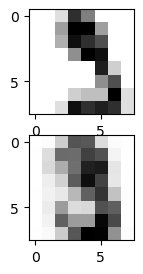

In [21]:
#Visualize a digit and the corresponding prediction
i = 8
test_image = np.reshape(X_val[i], (8,8))
pred_image = np.reshape(y_hat_val[i], (8,8))
fig, axs = plt.subplots(2, figsize=(3, 3))
axs[0].imshow(test_image, cmap=plt.cm.gray_r, interpolation="nearest")
axs[1].imshow(pred_image, cmap=plt.cm.gray_r, interpolation="nearest")
plt.show()

In [15]:
#Calculate reconstruction error for each digit
delta_prediction = y_hat_val - X_val
reconstruction_error = np.absolute(np.sum(delta_prediction, axis = 1, keepdims = True))

#Calculate average reconstruction error across all digits
avg_reconstruction_error = np.mean(reconstruction_error)
print(avg_reconstruction_error)

1.8019914699899418


In [16]:
#Need a comparison, so lets compare to noise
noise_nn = nn.NeuralNetwork(arch, lr = 10, seed = 2, batch_size=batch_size, epochs= 1, loss_function= 'BCE')
temp,temp = noise_nn.fit(X_train, X_train.T, X_val, X_val.T)
noise_val = noise_nn.predict(X_val)

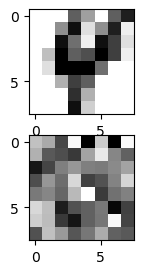

In [17]:
#Visualize a digit and the corresponding prediction
i = 32
test_image = np.reshape(X_val[i], (8,8))
noise_image = np.reshape(noise_val[i], (8,8))
fig, axs = plt.subplots(2, figsize=(3, 3))
axs[0].imshow(test_image, cmap=plt.cm.gray_r, interpolation="nearest")
axs[1].imshow(noise_image, cmap=plt.cm.gray_r, interpolation="nearest")
plt.show()

In [18]:
#Calculate reconstruction error for each digit
delta_noise = noise_val - X_val
noise_reconstruction_error = np.absolute(np.sum(delta_noise, axis = 1, keepdims = True))

#Calculate average reconstruction error across all digits
avg_noise_reconstruction_error = np.mean(noise_reconstruction_error)
print(avg_noise_reconstruction_error)

12.241647792115543


In [23]:
#Compare to how the nn did
print(avg_noise_reconstruction_error/avg_reconstruction_error)

6.793399411698587


Hyperparamter optimization:

I started with a learning rate of 0.01 and an epochs number of ~3x the size of my training set. These were chosen per the recommendation of: https://machinelearningmastery.com/learning-rate-for-deep-learning-neural-networks/ . Then I ran the nn training and plotted the loss per epoch for the trining and validation sets. If the plots looked like the learning was very slowed, I increased the leaaring rate by a factor of 10. I stopped when it looked like increasing the learning rate did not improve the loss per epoch any further.